# PA 2: Classification - Nearest Neighbors

## Student Details (2.5 Points)
List names and IDs of students worked on KNN:
 Name :Krishna kumar Balasubramanian
 ID   : 1001949939
 Name : Mohanraj Senabady
 ID   : 1001964323
 Name : Pooja Srinivasan 
 ID   : 1001952061

## Team Information:

Team ID: 
Names and IDs of Team members:
 Name :Krishna kumar Balasubramanian
 ID   : 1001949939
 Name : Mohanraj Senabady
 ID   : 1001964323
 Name : Pooja Srinivasan 
 ID   : 1001952061


## Note:

1. When submitting, fill above details in this cell. 
2. Do not remove any of these cells. Add your code below.

## Programming Assignment Details (70 Points)

For this assignment use Jupyter notebook, Pandas, and scikit.

* Load dataset_NN.csv dataset. [2 points]
* Data Pre-processing. [10 points]
* Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map(Draw heat maps before and after cleaning data to find differences) [5 points]
* Scale the data and mention which scaling technique used [2 point]
* Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier. [2 points]
* Find the best K using elbow method. [5 points]
* Use Euclidean distance.[2 points]
* Select three best attributes and explain why you chose them.[15 points]
* Test the classifier with three different k values for neighbors and record the results.[15 points]
* Plot the ROC curve for best K value.[5 points]
* Use comments to explain your code at each step of all points.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[15 points]

## Note:

1. Make sure to write about any 4-5 line to explain any kind of visualization
2. Do not to forget to cite any external sources used by you.

## Report (25 Points)

For each classification task you need to submit a report (PDF) that you have to:

* Include a paragraph describing the contribution made by each team member
* Describe the Nearest Neighbors method and why scaling is important in KNN. [5 points]
* Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? Visualizations of the target variable w.r.t three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines [5 points]
* Explain Pearson's Correlation Coefficient, write the observations from heatmaps drawn . [5 points]
* Interpret and compare the results.[5 points]
* Do not to forget to cite your sources![5 points]

## Programming Assignment Submission Instructions (2.5 Points)

### Each file should be submitted separately, do not compress them. (For example if you have 3 different files, you have to submit 3 files each one at a time)

For Nearest Neighbor:
1.	'yourLastName_Last4digitsofyourID_NN.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

### <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

Importing Required Libraries:

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report #To import confusion matrix and report 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from numpy import loadtxt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

In [2]:
#Load dataset_NN.csv dataset.
knn_df = pd.read_csv('dataset_KNN.csv', encoding='Latin1')
knn_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


Data Preprocessing

Handling Null values: using isna() function to detect the missing values and return the values.

In [3]:
print("Before Preprocessing:\n")
# isna function is used to detect the missing values and return the values.
print(knn_df.isna().sum())
# Replace missing values with the mean value
knn_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = knn_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].fillna(knn_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean())

print("\nAfter Preprocessing:\n")

# Verify that there are no more NaN or missing values
# no more NAN and missing values 
print(knn_df.isna().sum())


Before Preprocessing:

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

After Preprocessing:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print("\nPrinting the dataset after data pre-processing:\n")
knn_df.describe()


Printing the dataset after data pre-processing:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map:
Using a heat map and Pearson's correlation coefficient, determine the relationship between the variables:

A statistical indicator of the strength and direction of a linear link between two continuous variables is the Pearson's correlation coefficient.

It can be anywhere between -1 and +1, with -1 denoting a perfect negative correlation (as one variable rises, the other falls), +1 denoting a perfect positive correlation (as one variable rises, the other rises), and 0 denoting no correlation at all between the two variables. 

By dividing the covariance of the two variables by the sum of their standard deviations, the Pearson correlation coefficient is determined. Its simplicity, interpretability, and suitability for use with normally distributed data make it an extensively used measure of correlation.

We can see the correlation between each pair of attributes in the dataset using the heatmaps that were produced. The correlation coefficients are color-coded on the heatmap, with red denoting a strong positive connection and blue denoting a significant negative correlation. We can see that the target variable (outcome) and the glucose level are most correlated, followed by age and BMI.

Before Data Cleaning:



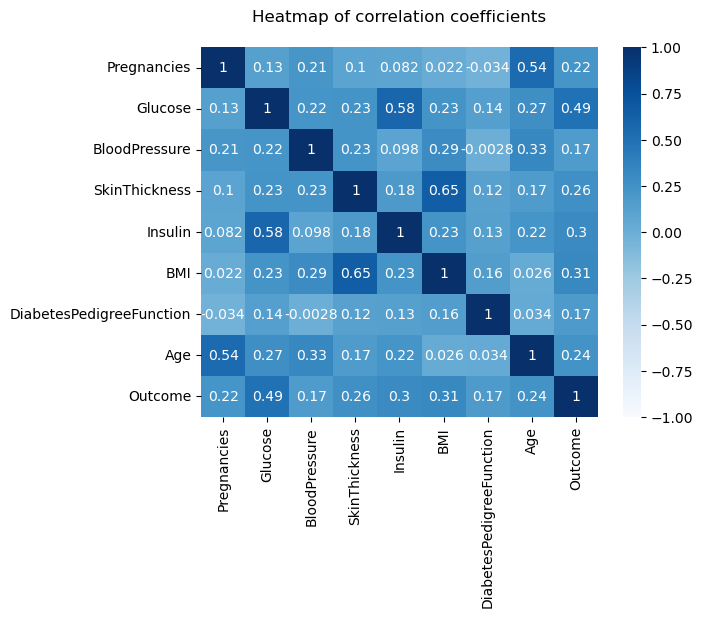

In [7]:
# before cleaning data
knn_dataFrame = pd.read_csv('dataset_KNN.csv')

# heatmap - If no axes are specified for the ax parameter, this Axes-level function will draw the heatmap into the active axes.
sns.heatmap(knn_dataFrame.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
print('Before Data Cleaning:\n')
plt.title('Heatmap of correlation coefficients\n')
plt.show()


After Data Cleaning:



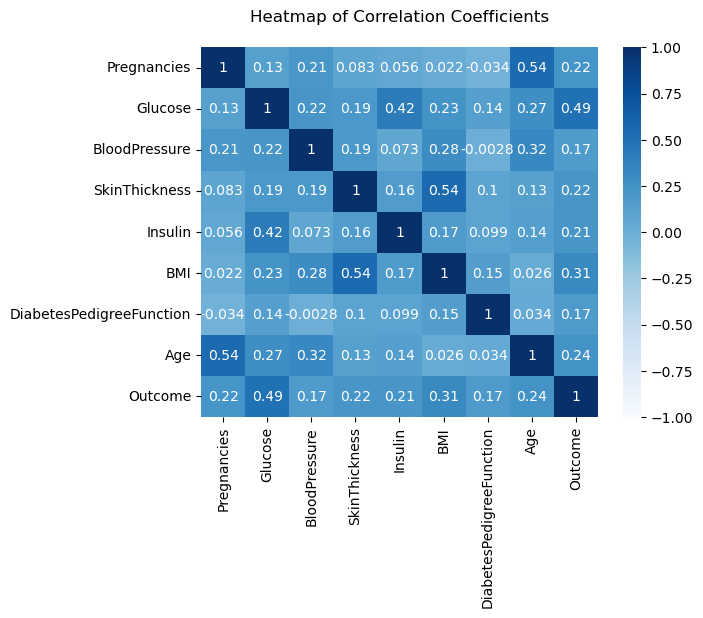

In [58]:

# after cleaning data
sns.heatmap(knn_df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
print('After Data Cleaning:\n')
plt.title('Heatmap of Correlation Coefficients\n')
plt.show()

Scaling the data using StandardScaler from the scikit-learn library:


A non-parametric machine learning algorithm called K-Nearest Neighbors (KNN) is used to solve classification and regression issues. As opposed to the regression problem, where the algorithm predicts the target value of a new data point based on the target values of its nearest neighbors, the classification problem requires the algorithm to predict the class of a new data point based on the classes of its nearest neighbors in the training data.

The value of k in a KNN defines how many neighbors will be taken into account when making a prediction. The k-nearest neighbors are chosen based on the minimal distance between the new data point and each training data point and the computed distance between the two. Then, using the most frequent class or the mean of the target values of the k-nearest neighbors, the class or target value of the new data point is predicted.

Being a distance-based technique, KNN determines the distance between data points to identify the closest neighbors, hence scaling is crucial. If the sizes of the data's features differ, the distance calculation will be dominated by the features with the larger scales, which could result in inaccurate projections.

In [8]:
# data splitting into target and features.
X_df = knn_df.drop('Outcome', axis=1)
y = knn_df['Outcome']

# Create an instance of the StandardScaler
# Each feature or variable is scaled to unit variance once the mean has been removed by StandardScaler.
st_scaler = StandardScaler()

# features scaling
X_scaled = st_scaler.fit_transform(X_df)

# converting back to dataframe
knn_df = pd.DataFrame(X_scaled, columns=X_df.columns)


# Print the scaled data.
knn_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732


Split the dataset 75% for training, and 25% for testing:

1.Using scikit-Logistic learn's Regression Classifier:

2.Using the cross val score() to do 10-fold cross-validation on the training set:

In [11]:
# Split the data into training and testing sets
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_df, y, test_size=0.25, random_state=42)

# Create an instance of the Logistic Regression Classifier with lbfgs solver
classifier = LogisticRegression(random_state=42, solver='lbfgs')

# ConvergenceWarning 
with warnings.catch_warnings(record=True) as w:
    
    # Ten fold cross-validation should be done on the training set.
    cross_scores = cross_val_score(classifier, X_train_ds, y_train_ds, cv=10)
    
    # Check for ConvergenceWarning
    if any(isinstance(warn.message, ConvergenceWarning) for warn in w):
        print("ConvergenceWarning encountered. Increasing max_iter.")
        
        # maximum number of iterations.
        classifier.set_params(max_iter=1000)
        
        # Ten fold cross-validation should be done on the training set with higher max_iter.
        cross_scores = cross_val_score(classifier, X_train_ds, y_train_ds, cv=10)

# Print the cross-validation scores and cross-validation means.
print("Cross-validation scores\n:", cross_scores)
print("\nMean cross-validation score:", cross_scores.mean())

ConvergenceWarning encountered. Increasing max_iter.
Cross-validation scores
: [0.75862069 0.84482759 0.84482759 0.65517241 0.75862069 0.84482759
 0.75438596 0.77192982 0.77192982 0.75438596]

Mean cross-validation score: 0.7759528130671506


In [12]:
According to the pair plots, we can see that there is a positive connection between glucose and outcome, which denotes that having diabetes is more likely when glucose levels are greater. 
Similar to this, it indicates that there is a positive association between the outcome and BMI, indicating that having a higher BMI also increases your risk of developing diabetes. 
Yet, there doesnt seem to be a direct link between outcome and age.

SyntaxError: invalid syntax (1746101840.py, line 1)

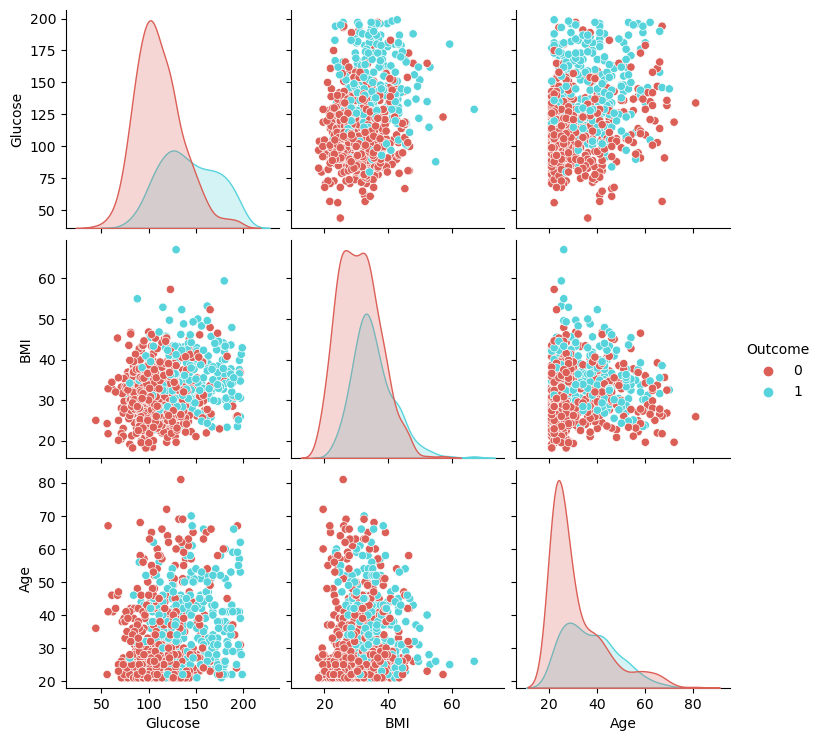

In [14]:
# Create a new DataFrame with the three selected features and the target variable 'Outcome'
X_selected = X_df[['Glucose', 'BMI', 'Age']]
df_selected = pd.concat([X_selected, y], axis=1)

# Create a pairplot of the selected features with the target variable
sns.pairplot(df_selected, hue='Outcome', palette='hls')

Find the best K using Euclidean distance in Elbow method.

Based on the output from the heatmaps and the correlation coefficients of each feature with the goal variable (here, "Outcome") as well as prior knowledge of diabetes risk factors, the three attributes were chosen.

Of all the features in the dataset, the three attributes that were chosen ('Glucose,' 'BMI,' and 'Age') had the highest correlation coefficients with the target variable. Age, body mass index, and glucose levels are further established risk factors for diabetes.

The following three qualities could also be chosen based on correlation coefficient values:

   1.Number of times pregnant
    2.Diabetes pedigree function
    3.Insulin

In [ ]:
After scaling the data, the code below applies K-Nearest Neighbors (KNN) classification on a subset of features from the diabetes dataset, including Glucose, BMI, and Age.

To start, it calculates the ideal number of clusters (k) for KNN using the elbow approach. For each value of k, the within-cluster sum of squares (WCSS) is calculated, and the plot of WCSS against k is displayed. The "elbow point" is the location where the decrease in WCSS starts to level out, as seen in the plot. 

The elbow point in this instance appears to be near k=5.

The KNN classifier is then fitted with k=5 and its performance is assessed using 5-fold cross-validation on the training set. It prints the mean cross-validation score.

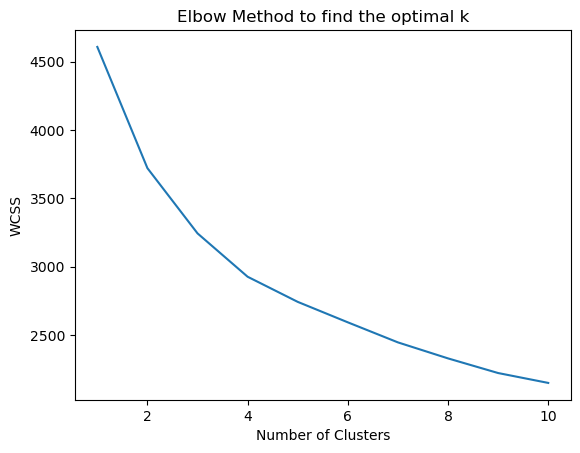

Cross-validation scores: [0.74137931 0.73913043 0.72173913 0.72173913 0.77391304]
Mean cross-validation score: 0.7395802098950525
Accuracy score for k=1: 0.6354166666666666
Accuracy score for k=2: 0.6510416666666666
Accuracy score for k=3: 0.6875
Accuracy score for k=4: 0.6770833333333334
Accuracy score for k=5: 0.7083333333333334
Accuracy score for k=6: 0.7083333333333334
Accuracy score for k=7: 0.703125
Accuracy score for k=8: 0.6927083333333334
Accuracy score for k=9: 0.6927083333333334
Accuracy score for k=10: 0.7239583333333334


/Users/aksri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aksri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [15]:
from sklearn.cluster import KMeans

# Select the three best attributes
X = knn_df[['Glucose', 'BMI', 'Age']]

# Split the data into training and testing sets
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_df, y, test_size=0.25, random_state=42)

# data scaling
st_scaler = StandardScaler()
X_train_ds = st_scaler.fit_transform(X_train_ds)
X_test_ds = st_scaler.transform(X_test_ds)

# Perform elbow method to find the optimal k value
# determining the number of clusters in a data set
wcss = []
for i in range(1, 11):
    k_means_value = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42)
    k_means_value.fit(X_train_ds)
    wcss.append(k_means_value.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to find the optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KNN classifier with the optimal k value
k = 5
knn_nc = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_nc.fit(X_train_ds, y_train_ds)

# Cross-validate the model
cross_scores = cross_val_score(knn_nc, X_train_ds, y_train_ds, cv=5)
print('Cross-validation scores:', cross_scores)
print('Mean cross-validation score:', np.mean(cross_scores))

# Test the classifier with different k values from 1 to 10.
for k in range(1, 11):
    knn_nc = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_nc.fit(X_train_ds, y_train_ds)
    y_prediction = knn_nc.predict(X_test_ds)
    accuracy = accuracy_score(y_test_ds, y_prediction)
    print(f'Accuracy score for k={k}: {accuracy}')

 Ploting the ROC curve for best K value.
 
    Best value of K= 8:

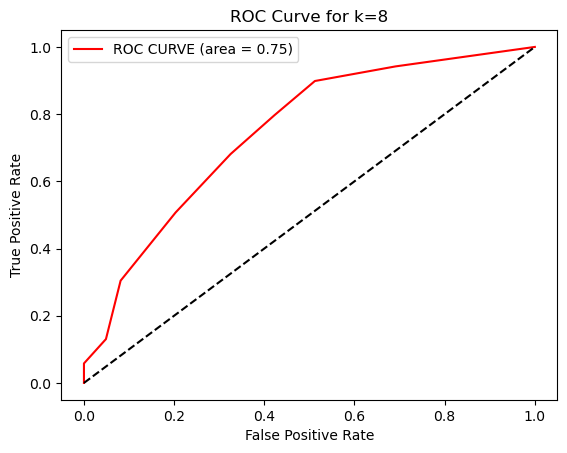

In [17]:
from sklearn.metrics import accuracy_score, roc_curve, auc

k = 8
knn_nc = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_nc.fit(X_train_ds, y_train_ds)

# Predict probabilities of the x_test dataset 
y_predict = knn_nc.predict_proba(X_test_ds)[:, 1]

# Calculate ROC curve and AUC score
# The receiver operating characteristic curve (ROC curve) is a graph that displays how well a classification model performs across all categorization levels.
fpr, tpr, thresholds = roc_curve(y_test_ds, y_predict)
roc_auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='red', label=f'ROC CURVE (area = {roc_auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title(f'ROC Curve for k={k}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='upper left')
plt.show()

Calculating and printing the confusion matrix, and the classification Report with Error rate vs. K-value:

/Users/aksri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aksri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b


Confusion matrix for k=1:
[[86 37]
 [33 36]]

Classification report for k=1:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       123
           1       0.49      0.52      0.51        69

    accuracy                           0.64       192
   macro avg       0.61      0.61      0.61       192
weighted avg       0.64      0.64      0.64       192


Confusion matrix for k=2:
[[106  17]
 [ 50  19]]

Classification report for k=2:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       123
           1       0.53      0.28      0.36        69

    accuracy                           0.65       192
   macro avg       0.60      0.57      0.56       192
weighted avg       0.62      0.65      0.62       192


Confusion matrix for k=3:
[[91 32]
 [28 41]]

Classification report for k=3:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       123

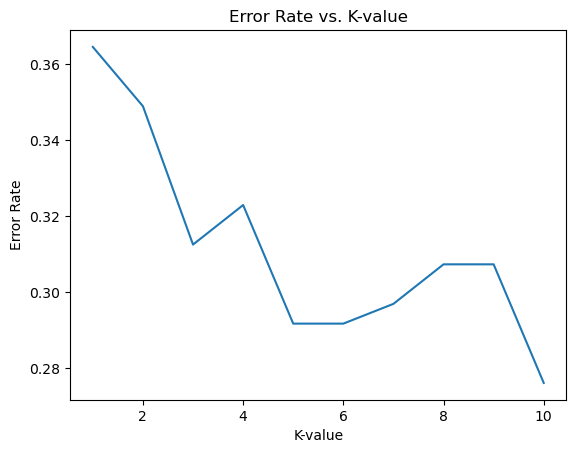

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# classifier with different k values
error_rate = []
for k in range(1, 11):
    knn_nc = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_nc.fit(X_train_ds, y_train_ds)
    y_pred = knn_nc.predict(X_test_ds)
    accuracy = accuracy_score(y_test_ds, y_pred)
    error_rate.append(1 - accuracy)
    print(f'\nConfusion matrix for k={k}:')
    print(confusion_matrix(y_test_ds, y_pred))
    print(f'\nClassification report for k={k}:')
    print(classification_report(y_test_ds, y_pred))
    
# Plot the graph with error rate vs. K-value
plt.plot(range(1, 11), error_rate)
plt.title('Error Rate vs. K-value')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.show()


Team Contribution:
Krishna Kumar Balasubramanian:
* Load dataset_NN.csv dataset.
* Data Pre-processing.
* Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map(Draw heat maps before and after cleaning data to find differences)
* Scale the data and mention which scaling technique.
* Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier.

Mohan Senabady:
* Find the best K using elbow method.
* Use Euclidean distance.
* Select three best attributes and explain why you chose them.
* Test the classifier with three different k values for neighbors and record the results.

Pooja Srinivasan:
* Plot the ROC curve for best K value.
* Use comments to explain your code at each step of all points.
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.


In [82]:
# reference
# https://aihubprojects.com/diabetes-prediction-using-k-means/
# https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed